## Исследование поведения клиентов оператора сотовой связи, определение какой из двух представленных тарифов более прибыльный для оператора.

Исследование проводится для компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

**Описание тарифов:**

1. **Тариф «Смарт»**

Ежемесячная плата: 550 рублей
* Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: минута разговора - 3 рубля, сообщение - 3 рубля, 1 Гб интернет-трафика - 200 рублей

2. **Тариф «Ультра»**

Ежемесячная плата: 1950 рублей
* Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
* Стоимость услуг сверх тарифного пакета: минута разговора - 1 рубль, сообщение - 1 рубль, 1 Гб интернет-трафика - 150 рублей

**Цель исследования** — проанализировать поведение клиентов и сделать вывод — какой тариф лучше, проверить гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

**Ход исследования:**

Данные получаем из файлов:
- /datasets/calls.csv
- /datasets/internet.csv
- /datasets/messages.csv
- /datasets/tariffs.csv
- /datasets/users.csv

Качество данных неизвестно, поэтому перед началом выполнения основной задачи понадобится обзор данных. 

Необходимо проверить данные на ошибки и оценить их влияние на исследование. Затем, на этапе предобработки необходимо найти возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в пять этапов:
 1. Открытие файлов с данными и изучение общей информации.
 2. Предобработка данных.
 3. Проведение анализа данных (исследование).
 4. Проверка гипотез:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
 5. Общие выводы по полученным результатам.

## 1. Откроем файлы с данными и изучим общую информацию:

In [1]:
import pandas as pd

import seaborn

import numpy as np

import math

from scipy import stats as st

In [2]:
df_calls = pd.read_csv('C:/DA/Project-3/calls.csv')
df_internet = pd.read_csv('C:/DA/Project-3/internet.csv')
df_messages = pd.read_csv('C:/DA/Project-3/messages.csv')
df_tariffs = pd.read_csv('C:/DA/Project-3/tariffs.csv')
df_users = pd.read_csv('C:/DA/Project-3/users.csv')

Поочередно просмотрим каждую таблицу.

Посмотрим таблицу с информацией по звонкам:

In [3]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [5]:
df_calls.duplicated().sum()

0

Согласно документации к данным в таблице 4 столбца:
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

По предварительному просмотру данных видно, что в таблице 202607 строк и в столбцах отсутствуют пропуски.

Посмотрим таблицу с информацией об интернет-сессиях:

In [6]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [7]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [8]:
df_internet.duplicated().sum()

0

Согласно документации к данным в таблице 4 столбца:
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

По предварительному просмотру данных видно, что в таблице имеется лишний столбец, дублирующий номера индекса, а также 149396 строк, пропуски в столбцах отсутствуют.

Посмотрим таблицу с информацией о сообщениях:

In [9]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [10]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [11]:
df_messages.duplicated().sum()

0

Согласно документации к данным в таблице 3 столбца:
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

По предварительному просмотру данных видно, что в таблице 123036 строк, пропуски в столбцах отсутствуют.

Посмотрим таблицу с информацией о тарифах:

In [12]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [13]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Согласно документации к данным в таблице 8 столбцов:
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

По предварительному просмотру данных видно, что в таблице всего 2 строки в соответствии с представленными тарифами, пропущенные значения в таблице отсутствуют.

Посмотрим таблицу с информацией о пользователях:

In [14]:
df_users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [15]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [16]:
len(df_users['user_id'].unique())

500

Согласно документации к данным в таблице 8 столбцов:
- user_id — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tarif — название тарифного плана

По предварительному просмотру данных видно, что в таблице 500 строк в соответствии с количеством пользователей, пропущенные значения имеются в столбце churn_date, при этом значения в этом столбце имеются всего в 38 строках (38 пользователей сменили тариф).

**Вывод:**

В нашем распоряжении имеется 5 таблиц с данными, одна из которых описывает пользователей тарифов, одна описывает тарифы и 3 таблицы описывают объем пользования определенной услугой (каждая таблица разную услугу) - звонки, интернет и сообщения.

Предварительно можно утверждать, что данных достаточно для поставленных в работе целей. Но названия некоторых колонок недостаточно информативны / недостаточно корректны. Также в таблице с информацией о звонках в столбце с длительностью звонков значения отражены не в целых минутах, хотя по документации мы знаем, что оператор округляет каждый звонок до минуты.

Чтобы двигаться дальше, нужно устранить проблемы в данных.

## 2. Подготовка данных (предобработка):

**Подготовку данных разделим на 2 этапа:**

1. Предобработка данных, включающая следующие необходимые действия:
- необходимо переименовать столбцы для удобства в работе;
- привести данные к нужным типам;
- найти и устранить ошибки при наличие.

2. Подсчет для каждого пользователя:
- количества сделанных звонков и израсходованных минут разговора по месяцам;
- количества отправленных сообщений по месяцам;
- объема израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

### 2.1 Предобработка данных:

В предыдущем пункте при просмотре таблицы df_calls были выявлены следующие недочеты:
- столбец с уникальным номером звонка обозначен просто id, последующие таблицы имеют столбец с аналогичным именем, переименуем столбец в calls_id;
- столбец duration для большей информативности переименуем в calls_duration
- столбец с информацией о дате звонка call_date необходимо перевести в формат datetime для дальнейшей работы с ним;
- столбец с информацией о длительности звонков округлим в большую сторону (согласно правилу оператора по подсчету минут).

In [17]:
df_calls = df_calls.rename(columns={'id': 'calls_id', 'duration': 'calls_duration'})
df_calls.columns

Index(['calls_id', 'call_date', 'calls_duration', 'user_id'], dtype='object')

In [18]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls['calls_duration'] = np.ceil(df_calls['calls_duration']).astype('int')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   calls_id        202607 non-null  object        
 1   call_date       202607 non-null  datetime64[ns]
 2   calls_duration  202607 non-null  int32         
 3   user_id         202607 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 5.4+ MB


In [19]:
df_calls.head()

,calls_id,call_date,calls_duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


В предыдущем пункте при просмотре таблицы df_internet были выявлены следующие недочеты:
- столбец с уникальным номером интренет-сессии обозначен просто id, переименуем столбец в internet_session_id;
- столбец с информацией о дате сессии session_date необходимо перевести в формат datetime для дальнейшей работы с ним;
- удалим лишний столбец Unnamed: 0.

In [20]:
df_internet = df_internet.rename(columns={'id': 'internet_session_id'})
df_internet.columns

Index(['Unnamed: 0', 'internet_session_id', 'mb_used', 'session_date',
       'user_id'],
      dtype='object')

In [21]:
df_internet.drop('Unnamed: 0', axis=1, inplace=True)
df_internet.head()

,internet_session_id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


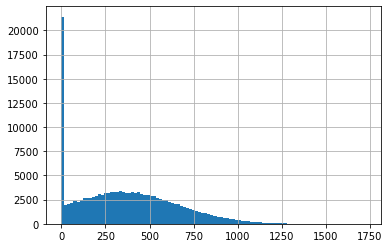

In [22]:
#  Комментарий ревьюера V2
df_internet.mb_used.hist(bins = 100);

In [23]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   internet_session_id  149396 non-null  object        
 1   mb_used              149396 non-null  float64       
 2   session_date         149396 non-null  datetime64[ns]
 3   user_id              149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


В предыдущем пункте при просмотре таблицы df_messages были выявлены следующие недочеты:
- столбец с уникальным номером сообщения обозначен просто id, переименуем столбец в message_id;
- столбец с информацией о дате сообщения message_date необходимо перевести в формат datetime для дальнейшей работы с ним.

In [24]:
df_messages = df_messages.rename(columns={'id': 'message_id'})
df_messages.columns

Index(['message_id', 'message_date', 'user_id'], dtype='object')

In [25]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_id    123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


В таблице df_tariffs переименуем столбец mb_per_month_included на mb_included:

In [26]:
df_tariffs = df_tariffs.rename(columns={'mb_per_month_included': 'mb_included'})
df_tariffs.columns

Index(['messages_included', 'mb_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

В таблице df_users столбец с информацией о дате прекращения пользования тарифом churn_date и столбец с информацией о дате подключения тарифа reg_date необходимо перевести в формат datetime для дальнейшей работы с ними:

In [27]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### 2.2 Подсчет информации для каждого пользователя:

- количества сделанных звонков и израсходованных минут разговора по месяцам;
- количества отправленных сообщений по месяцам;
- объема израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

#### 2.2.1 Посчитаем количество сделанных звонков и израсходованных минут разговора по месяцам, для начала добавим столбец с месяцем:

In [28]:
df_calls['month'] = pd.DatetimeIndex(df_calls['call_date']).month
df_calls.head()

,calls_id,call_date,calls_duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Сгруппируем значения по пользователю и месяцу:

In [29]:
calls_group = df_calls.groupby(['user_id', 'month']).agg({'calls_duration': ['count', 'sum']}).reset_index()
calls_group.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_group.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [30]:
len(calls_group['user_id'].unique())

492

**Примечание:** 8 пользователей не пользовались услугой звонков.

#### 2.2.2 Посчитаем количество отправленных сообщений по месяцам - добавим столбец с месяцем и построим сводную таблицу:

In [31]:
df_messages['month'] = pd.DatetimeIndex(df_messages['message_date']).month
df_messages.head()

,message_id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [32]:
messages_group = df_messages.groupby(['user_id', 'month'])['message_id'].count().reset_index()
messages_group.columns = ['user_id', 'month', 'messages_count']
messages_group.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [33]:
len(messages_group['user_id'].unique())

426

**Примечание:** 74 пользователей не пользовались услугой сообщений.

#### 2.2.3 Посчитаем объем использованного интернет трафика по месяцам - добавим столбец с месяцем и построим сводную таблицу:

In [34]:
df_internet['month'] = pd.DatetimeIndex(df_internet['session_date']).month
df_internet.head()

,internet_session_id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [35]:
internet_group = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_group.columns = ['user_id', 'month', 'internet_sum']
internet_group.head()

,user_id,month,internet_sum
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Согласно правилу оператора, необходимо округлить мегабайты до гигабайтов:

In [36]:
internet_group['internet_sum'] = np.ceil(internet_group['internet_sum'] / 1024).astype('int')
internet_group.head()

,user_id,month,internet_sum
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


In [37]:
len(internet_group['user_id'].unique())

497

**Примечание:** 3 пользователя не пользовались услугой интернета.

#### 2.2.4 Объединим полученные сгруппированные таблицы с таблицей, содержащей информацию о пользователях:

In [38]:
all_monthly_services_values = calls_group.merge(messages_group, on=['user_id', 'month'], how='outer')
all_monthly_services_values = all_monthly_services_values.merge(internet_group, on=['user_id', 'month'], how='outer')
all_monthly_services_values.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_sum
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
5,1000,10,57.0,350.0,73.0,15.0
6,1000,11,43.0,338.0,58.0,15.0
7,1000,12,46.0,333.0,70.0,10.0
8,1001,11,59.0,430.0,NaN,18.0
9,1001,12,63.0,414.0,NaN,14.0


In [39]:
all_monthly_services_values = all_monthly_services_values.merge(df_users, on='user_id', how='outer')
all_monthly_services_values.head(10)

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
5,1000,10.0,57.0,350.0,73.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
6,1000,11.0,43.0,338.0,58.0,15.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
7,1000,12.0,46.0,333.0,70.0,10.0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
8,1001,11.0,59.0,430.0,NaN,18.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
9,1001,12.0,63.0,414.0,NaN,14.0,41,NaT,Москва,Иван,Ежов,2018-11-01,smart


In [40]:
all_monthly_services_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls_count     3174 non-null   float64       
 3   calls_sum       3174 non-null   float64       
 4   messages_count  2717 non-null   float64       
 5   internet_sum    3203 non-null   float64       
 6   age             3216 non-null   int64         
 7   churn_date      189 non-null    datetime64[ns]
 8   city            3216 non-null   object        
 9   first_name      3216 non-null   object        
 10  last_name       3216 non-null   object        
 11  reg_date        3216 non-null   datetime64[ns]
 12  tariff          3216 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.8+ KB


**Примечание:** всего получилось 3216 строк, в столбцах по объемом использованных услуг имеются пропуски - пользователи не каждый месяц пользовались какой-то из услуг. Также в столбце месяца имеются 2 пропуска - скорее всего 2 пользователя вообще не пользовались услугами, нужно проверить:
* пропуски по месяцам и определить возможность удаления данных строк;
* заполним пропуски по объемам услуг значением 0 и привести значения к целочисленным значениям.

##### Технический долг 1 (убираем 2 строки с отсутствием информации по использованию услуг, но абенентская плата за месяц взимается)

In [41]:
all_monthly_services_values[all_monthly_services_values['month'].isna()]

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
3215,1371,NaN,NaN,NaN,NaN,NaN,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


Версия подтвердилась - 2 пользователя подключили тариф и в тот же месяц отказались от его использования, удалим эти строки.

In [42]:
all_monthly_services_values.drop(labels=[3214, 3215], axis=0, inplace=True)
all_monthly_services_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls_count     3174 non-null   float64       
 3   calls_sum       3174 non-null   float64       
 4   messages_count  2717 non-null   float64       
 5   internet_sum    3203 non-null   float64       
 6   age             3214 non-null   int64         
 7   churn_date      187 non-null    datetime64[ns]
 8   city            3214 non-null   object        
 9   first_name      3214 non-null   object        
 10  last_name       3214 non-null   object        
 11  reg_date        3214 non-null   datetime64[ns]
 12  tariff          3214 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory usage: 351.5+ KB


In [43]:
empty_columns = ['month', 'calls_count', 'calls_sum', 'messages_count', 'internet_sum']

for column in empty_columns:
    all_monthly_services_values[column] = all_monthly_services_values[column].fillna(0).astype('int')

In [44]:
all_monthly_services_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3214 non-null   int64         
 1   month           3214 non-null   int32         
 2   calls_count     3214 non-null   int32         
 3   calls_sum       3214 non-null   int32         
 4   messages_count  3214 non-null   int32         
 5   internet_sum    3214 non-null   int32         
 6   age             3214 non-null   int64         
 7   churn_date      187 non-null    datetime64[ns]
 8   city            3214 non-null   object        
 9   first_name      3214 non-null   object        
 10  last_name       3214 non-null   object        
 11  reg_date        3214 non-null   datetime64[ns]
 12  tariff          3214 non-null   object        
dtypes: datetime64[ns](2), int32(5), int64(2), object(4)
memory usage: 288.8+ KB


**Вывод:**

Всего в общей таблице по объемам пользования услугами, сгруппированной по пользователям и месяцам, получилось 3214 строк. При этом выяснилось, что информация содержится по 498 пользователям, а не по 500, т.к. 2 пользователя отказались от услуг в месяц подключения.

#### 2.2.5 Посчитаем помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

In [45]:
all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


Напишем функцию для строки и добавим столбец с дополнительными платежами за звонки по результатам месяца:

In [46]:
def calls_extra_monthly_payments(row):
    calls_sum = row['calls_sum']
    tariff = row['tariff']
    
    if tariff == 'smart':
        if calls_sum <= 500:
            return 0
        else:
            return (calls_sum - 500) * 3
        
    if tariff == 'ultra':
        if calls_sum <= 3000:
            return 0
        else:
            return (calls_sum - 3000)

In [47]:
all_monthly_services_values['calls_extra_payments'] = all_monthly_services_values.apply(calls_extra_monthly_payments, axis=1)
all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_extra_payments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0


Напишем функцию для строки и добавим столбец с дополнительными платежами за сообщения по результатам месяца:

In [48]:
def messages_extra_monthly_payments(row):
    messages_count = row['messages_count']
    tariff = row['tariff']
    
    if tariff == 'smart':
        if messages_count <= 50:
            return 0
        else:
            return (messages_count - 50) * 3
        
    if tariff == 'ultra':
        if messages_count <= 1000:
            return 0
        else:
            return (messages_count - 1000)

In [49]:
all_monthly_services_values['messages_extra_payments'] = all_monthly_services_values.apply(messages_extra_monthly_payments, axis=1)
all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_extra_payments,messages_extra_payments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0


Напишем функцию для строки и добавим столбец с дополнительными платежами за интернет по результатам месяца:

In [50]:
def internet_extra_monthly_payments(row):
    internet_sum = row['internet_sum']
    tariff = row['tariff']
    
    if tariff == 'smart':
        if internet_sum <= 15:
            return 0
        else:
            return (internet_sum - 15) * 200
        
    if tariff == 'ultra':
        if internet_sum <= 30:
            return 0
        else:
            return (internet_sum - 30) * 150

In [51]:
all_monthly_services_values['internet_extra_payments'] = all_monthly_services_values.apply(internet_extra_monthly_payments, axis=1)
all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_extra_payments,messages_extra_payments,internet_extra_payments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0


Напишем функцию для строки и добавим столбец с общей суммой платежа за все услуги и абонентской платы по результатам месяца:

In [52]:
all_monthly_services_values['all_payments'] = (
    np.select(
        condlist=[all_monthly_services_values['tariff'] == 'ultra', all_monthly_services_values['tariff'] == 'smart'],
        
        choicelist=[all_monthly_services_values['calls_extra_payments']+all_monthly_services_values['messages_extra_payments']+all_monthly_services_values['internet_extra_payments'] +1950,
                    all_monthly_services_values['calls_extra_payments']+all_monthly_services_values['messages_extra_payments']+all_monthly_services_values['internet_extra_payments'] +550] 
        ))

all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_extra_payments,messages_extra_payments,internet_extra_payments,all_payments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950


**Вывод:**

Подготовка данных выполнена. Предварительно можно считать, что расчитанных данных достаточно для проведения анализа и проверки гипотез.

## 3. Проведение анализа данных (исследование):

Предстоит проверить поведение клиентов оператора, исходя из выборки - определить сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц, для этого необходимо:
- посчитать среднее количество, дисперсию и стандартное отклонение;
- построить гистограммы;
- описать распределения.

### 3.1 Расчитаем среднее количество использованных услуг в месяц для пользователей каждого тарифа, а также средний ежемесячный платеж:

In [53]:
df_smart = all_monthly_services_values.query('tariff == "smart"')
df_ultra = all_monthly_services_values.query('tariff == "ultra"')

In [54]:
smart_mean_calls = df_smart['calls_sum'].mean()
smart_mean_messages = df_smart['messages_count'].mean()
smart_mean_internet = df_smart['internet_sum'].mean()
smart_mean_payments = df_smart['all_payments'].mean()

ultra_mean_calls = df_ultra['calls_sum'].mean()
ultra_mean_messages = df_ultra['messages_count'].mean()
ultra_mean_internet = df_ultra['internet_sum'].mean()
ultra_mean_payments = df_ultra['all_payments'].mean()

print(f'Cреднее количество используемых минут в месяц для пользователей тарифа Smart - {smart_mean_calls:.0f}')
print()
print(f'Cреднее количество используемых сообщений в месяц для пользователей тарифа Smart - {smart_mean_messages:.0f}')
print()
print(f'Cреднее количество используемых гигабайтов в месяц для пользователей тарифа Smart - {smart_mean_internet:.0f}')
print()
print(f'Cредний ежемесячный платеж по тарифу Smart - {smart_mean_payments:.0f}')
print()
print(f'Cреднее количество используемых минут в месяц для пользователей тарифа Ultra - {ultra_mean_calls:.0f}')
print()
print(f'Cреднее количество используемых сообщений в месяц для пользователей тарифа Ultra - {ultra_mean_messages:.0f}')
print()
print(f'Cреднее количество используемых гигабайтов в месяц для пользователей тарифа Ultra - {ultra_mean_internet:.0f}')
print()
print(f'Cредний ежемесячный платеж по тарифу Ultra - {ultra_mean_payments:.0f}')

Cреднее количество используемых минут в месяц для пользователей тарифа Smart - 418

Cреднее количество используемых сообщений в месяц для пользователей тарифа Smart - 33

Cреднее количество используемых гигабайтов в месяц для пользователей тарифа Smart - 16

Cредний ежемесячный платеж по тарифу Smart - 1290

Cреднее количество используемых минут в месяц для пользователей тарифа Ultra - 527

Cреднее количество используемых сообщений в месяц для пользователей тарифа Ultra - 49

Cреднее количество используемых гигабайтов в месяц для пользователей тарифа Ultra - 19

Cредний ежемесячный платеж по тарифу Ultra - 2070


**Примечание:** судя по полученным значениям, пользователи тарифа Smart в среднем платят в 2 раза больше абонентской платы. Пользователи тарифа Ultra в среднем платят немного больше абонентской платы.

In [55]:
display ( all_monthly_services_values[['calls_sum', 'messages_count', 'internet_sum', 'all_payments']]
        .loc[(all_monthly_services_values['tariff']=='ultra')].describe()
        )

display ( all_monthly_services_values[['calls_sum', 'messages_count', 'internet_sum', 'all_payments']]
         .loc[(all_monthly_services_values['tariff']=='smart')].describe()
        )


,calls_sum,messages_count,internet_sum,all_payments
count,985.000000,985.000000,985.000000,985.000000
mean,526.623350,49.363452,19.494416,2070.152284
std,317.606098,47.804457,9.853511,376.187114
min,0.000000,0.000000,0.000000,1950.000000
25%,284.000000,6.000000,12.000000,1950.000000
50%,518.000000,38.000000,19.000000,1950.000000
75%,752.000000,79.000000,27.000000,1950.000000
max,1673.000000,224.000000,49.000000,4800.000000


,calls_sum,messages_count,internet_sum,all_payments
count,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,33.384029,16.328847,1289.973531
std,190.313730,28.227876,5.747061,818.404367
min,0.000000,0.000000,0.000000,550.000000
25%,282.000000,10.000000,13.000000,550.000000
50%,422.000000,28.000000,17.000000,1023.000000
75%,545.000000,51.000000,20.000000,1750.000000
max,1435.000000,143.000000,38.000000,6770.000000


In [56]:
# применение метода .quantile(.29) показывает значение распределение на 100% шкале, т.е. .quantile(.5) = медиане выборки
# посмотрим сколько процентов записей переплачивают за тариф смарт

all_monthly_services_values['all_payments'].loc[(all_monthly_services_values['tariff']=='smart')].quantile(.29)

604.36

In [57]:
# кол-во месяцев использования клиентами услуг телеком-компании
all_monthly_services_values.groupby('user_id')['month'].count()

user_id
1000     8
1001     2
1002     7
1003     5
1004     8
        ..
1495     5
1496    12
1497     3
1498     4
1499     4
Name: month, Length: 498, dtype: int64

### 3.2 Расчитаем дисперсию использованных услуг в месяц для пользователей каждого тарифа, а также дисперсию для ежемесячного платежа:

Т.к. мы имеем дело не с генеральной совокупностью, а с выборкой, то для посчета дисперсии применим метод var() с параметром ddof=1.

In [58]:
smart_variance_calls = np.var(df_smart['calls_sum'], ddof=1)
smart_variance_messages = np.var(df_smart['messages_count'], ddof=1)
smart_variance_internet = np.var(df_smart['internet_sum'], ddof=1)
smart_variance_payments = np.var(df_smart['all_payments'], ddof=1)

ultra_variance_calls = np.var(df_ultra['calls_sum'], ddof=1)
ultra_variance_messages = np.var(df_ultra['messages_count'], ddof=1)
ultra_variance_internet = np.var(df_ultra['internet_sum'], ddof=1)
ultra_variance_payments = np.var(df_ultra['all_payments'], ddof=1)

print(f'Дисперсия для значений используемых минут в месяц для пользователей тарифа Smart - {smart_variance_calls:.3f}')
print()
print(f'Дисперсия для значений используемых сообщений в месяц для пользователей тарифа Smart - {smart_variance_messages:.3f}')
print()
print(f'Дисперсия для значений используемых гигабайтов в месяц для пользователей тарифа Smart - {smart_variance_internet:.3f}')
print()
print(f'Дисперсия для значений ежемесячного платежа по тарифу Smart - {smart_variance_payments:.3f}')
print()
print(f'Дисперсия для значений используемых минут в месяц для пользователей тарифа Ultra - {ultra_variance_calls:.3f}')
print()
print(f'Дисперсия для значений используемых сообщений в месяц для пользователей тарифа Ultra - {ultra_variance_messages:.3f}')
print()
print(f'Дисперсия для значений используемых гигабайтов в месяц для пользователей тарифа Ultra - {ultra_variance_internet:.3f}')
print()
print(f'Дисперсия для значений ежемесячного платежа по тарифу Ultra - {ultra_variance_payments:.3f}')

Дисперсия для значений используемых минут в месяц для пользователей тарифа Smart - 36219.316

Дисперсия для значений используемых сообщений в месяц для пользователей тарифа Smart - 796.813

Дисперсия для значений используемых гигабайтов в месяц для пользователей тарифа Smart - 33.029

Дисперсия для значений ежемесячного платежа по тарифу Smart - 669785.708

Дисперсия для значений используемых минут в месяц для пользователей тарифа Ultra - 100873.633

Дисперсия для значений используемых сообщений в месяц для пользователей тарифа Ultra - 2285.266

Дисперсия для значений используемых гигабайтов в месяц для пользователей тарифа Ultra - 97.092

Дисперсия для значений ежемесячного платежа по тарифу Ultra - 141516.745


### 3.3 Расчитаем стандартное отклонение для значений использованных услуг в месяц для пользователей каждого тарифа, а также стандартное отклонение для значений ежемесячного платежа:

Для расчета стандартного отклонения можно воспользоваться методом std() библиотеки numpy, но так как ранее мы нашли дисперсию, то проще вычесть корень из значения дисперсии, воспользовавшись методом sqrt().

In [59]:
smart_std_calls = np.sqrt(smart_variance_calls)
smart_std_messages = np.sqrt(smart_variance_messages)
smart_std_internet = np.sqrt(smart_variance_internet)
smart_std_payments = np.sqrt(smart_variance_payments)

ultra_std_calls = np.sqrt(ultra_variance_calls)
ultra_std_messages = np.sqrt(ultra_variance_messages)
ultra_std_internet = np.sqrt(ultra_variance_internet)
ultra_std_payments = np.sqrt(ultra_variance_payments)

print(f'Стандартное отклонение для значений используемых минут в месяц для пользователей тарифа Smart - {smart_std_calls:.3f}')
print()
print(f'Стандартное отклонение используемых сообщений в месяц для пользователей тарифа Smart - {smart_std_messages:.3f}')
print()
print(f'Стандартное отклонение используемых гигабайтов в месяц для пользователей тарифа Smart - {smart_std_internet:.3f}')
print()
print(f'Стандартное отклонение по платежам для тарифа Smart - {smart_std_payments:.3f}')
print()
print(f'Стандартное отклонение используемых минут в месяц для пользователей тарифа Ultra - {ultra_std_calls:.3f}')
print()
print(f'Стандартное отклонение используемых сообщений в месяц для пользователей тарифа Ultra - {ultra_std_messages:.3f}')
print()
print(f'Стандартное отклонение используемых гигабайтов в месяц для пользователей тарифа Ultra - {ultra_std_internet:.3f}')
print()
print(f'Стандартное отклонение по платежам для тарифа Ultra - {ultra_std_payments:.3f}')

Стандартное отклонение для значений используемых минут в месяц для пользователей тарифа Smart - 190.314

Стандартное отклонение используемых сообщений в месяц для пользователей тарифа Smart - 28.228

Стандартное отклонение используемых гигабайтов в месяц для пользователей тарифа Smart - 5.747

Стандартное отклонение по платежам для тарифа Smart - 818.404

Стандартное отклонение используемых минут в месяц для пользователей тарифа Ultra - 317.606

Стандартное отклонение используемых сообщений в месяц для пользователей тарифа Ultra - 47.804

Стандартное отклонение используемых гигабайтов в месяц для пользователей тарифа Ultra - 9.854

Стандартное отклонение по платежам для тарифа Ultra - 376.187


### 3.4 Построим гистограммы для значений использованных услуг в месяц для пользователей каждого тарифа и опишем полученные распределения:

Для описания выводом по гистограмма посчитаем количество данных по обоим тарифам:

In [60]:
len(df_smart)

2229

In [61]:
len(df_ultra)

985

**Примечание:** значений по тарифу Smart больше чем в 2 раза, учтем это (на гистаграммах плотность значений у тарифа Smart будет больше).

Построим гистограммы для объема звонков пользователей по обоим тарифам:

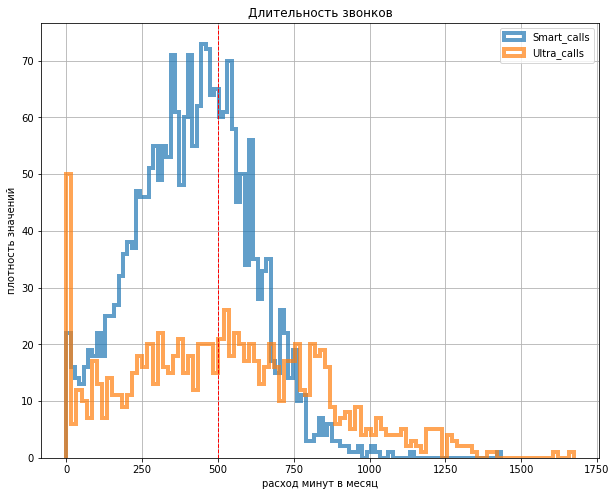

In [62]:
ax = df_smart.plot(
    kind='hist',
    y='calls_sum',
    histtype='step',
    bins=100,
    linewidth=4,
    alpha=0.7,
    label='Smart_calls',
    figsize=(10, 8)
)
df_ultra.plot(
    kind='hist',
    y='calls_sum',
    histtype='step',
    bins=100,
    linewidth=4,
    alpha=0.7,
    label='Ultra_calls',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(10, 8)
)

limit_smart = 500
ax.axvline(x=limit_smart, color='r', linestyle='dashed', linewidth=1)
ax.set_title('Длительность звонков')
ax.set_xlabel('расход минут в месяц')
ax.set_ylabel('плотность значений');

- По гистограмме тарифа Smart видно, что распределение стремится к нормальному и основная часть значений лежит в пределах значений от 150 до 700, что означает частое превышение пользователями лимита по доступным минутам разговоров (500 минут в месяц). Справа имеется хвост с отдельными выпадающими значениями, а в значении 0 виден небольшой всплеск (пользователи тарифа Smart часто не пользуются данной услугой).


- По гистограмме тарифа Ultra видно, что данные имеют большой разброс, что подтверждает ранее полученные значения дисперсии и стандартного отклонения. Также имеется смещение значений вправо, а слева в значении 0 виден большой всплеск (пользователи тарифа Ultra значительно часто не пользуются данной услугой). Значения превышающие лимит, установленный тарифом Ultra в 3000 минут не превышаются - максимальная длительность звонков достигает значений 1750.

Построим гистограммы для количества сообщений пользователей по обоим тарифам:

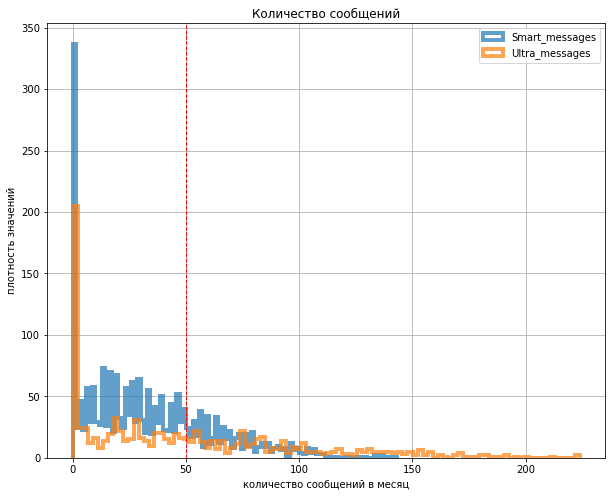

In [63]:
ax = df_smart.plot(
    kind='hist',
    y='messages_count',
    histtype='step',
    bins=100,
    linewidth=4,
    alpha=0.7,
    label='Smart_messages',
    figsize=(10, 8)
)
df_ultra.plot(
    kind='hist',
    y='messages_count',
    histtype='step',
    bins=100,
    linewidth=4,
    alpha=0.7,
    label='Ultra_messages',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(10, 8)
)

limit_smart = 50
ax.axvline(x=limit_smart, color='r', linestyle='dashed', linewidth=1)
ax.set_title('Количество сообщений')
ax.set_xlabel('количество сообщений в месяц')
ax.set_ylabel('плотность значений');

- По гистограмме тарифа Smart видно, что основная часть распределения лежит в пределах звачений от 0 до 70, что означает частое превышение пользователями лимита по доступному количеству сообщений (50 сообщений в месяц), распределение смещено вправо. Также имеется большое количество со значением 0, что значит о не использовании многими пользователями данной услуги.


- По гистограмме тарифа Ultra видно, что распределение смещено вправо. Также имеется большое количество со значением 0, что значит о не использовании многими пользователями данной услуги, также среди пользователей тарифа Ultra есть те, кто в месяц отправляет более 200 сообщений, но значения превышающие лимит, установленный тарифом Ultra в 1000 сообщений не превышаются - максимальная длительность звонков достигает значений около 250.

Построим гистограммы для использованного интернет трафика пользователями по обоим тарифам:

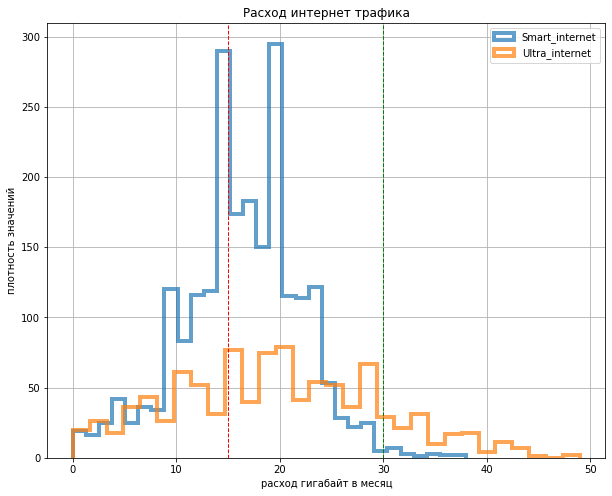

In [64]:
ax = df_smart.plot(
    kind='hist',
    y='internet_sum',
    histtype='step',
    bins=30,
    linewidth=4,
    alpha=0.7,
    label='Smart_internet',
    figsize=(10, 8)
)
df_ultra.plot(
    kind='hist',
    y='internet_sum',
    histtype='step',
    bins=30,
    linewidth=4,
    alpha=0.7,
    label='Ultra_internet',
    ax=ax,
    grid=True,
    legend=True,
    figsize=(10, 8)
)

limit_smart = 15
limit_ultra = 30
ax.axvline(x=limit_smart, color='r', linestyle='dashed', linewidth=1)
ax.axvline(x=limit_ultra, color='g', linestyle='dashed', linewidth=1)
ax.set_title('Расход интернет трафика')
ax.set_xlabel('расход гигабайт в месяц')
ax.set_ylabel('плотность значений');

- По гистограмме тарифа Smart видно, что распределение стремится к нормальному и основная часть значений лежит в промежутке от 10 до 22, что означает частое и значительное превышение пользователями лимита по доступному объему интернет трафика (15 гигабайт в месяц), хотя распределение смещено влево.


- По гистограмме тарифа Ultra видно, что распределение стремится к нормальному и смещено влево. Основная часть значений лежит в промежутке от 10 до 28 (большенство пользователей укладываются в лимит интернет трафика по тарифу Ultra - 30 гигабайт), но имеются значения, превышающие установленный по тарифу лимит - небольшое количество пользователей превышает лимит.

**Вывод по гистаграммам:**
- В отличае от гистаграмм по звонкам и по сообщениям, на гистаграммах по интернет трафику отсутствуют всплески на значении 0 (пользователи, не использующие интернет трафик не такое частое явление), это позволяет утверждать, что данная услуга мобильной связи является самой популярной;
- По тарифу Ultra также видно, что пользователи данного тарифа не превышают лимиты минутам разговоров и по количеству сообщений, но превышают объем доступного интернет трафика.

## 4. Проверка гипотез:

### 4.1 Проверим гипотезу - средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается:

Так как мы работаем с выборкой, то данные по двум тарифам являются парными выборками по одной генеральной совокупности, а следовательно для проверки гипотезы о равенстве средней выручки по двум тарифам нужно нужно применить метод scipy.stats.ttest_ind().

In [65]:
ultra_all_payments_list = list(df_ultra['all_payments'])
len(ultra_all_payments_list)

985

In [66]:
smart_all_payments_list = list(df_smart['all_payments'])
len(smart_all_payments_list)

2229

Наша гипотеза будет двусторонней, а ее нулевая и альтернативная гипотезы:
- нулевая гипотеза - средняя выручка пользователей двух тарифов равна;
- альтернативная гипотеза - средняя выручка пользователей двух тарифов различается.

In [67]:
alpha = .05

results = st.ttest_ind(
    smart_all_payments_list, 
    ultra_all_payments_list)

print(f'Средняя выручна от пользователей тарифа Smart: {df_smart["all_payments"].mean():.2f}')
print(f'Средняя выручна от пользователей тарифа Ultra: {df_ultra["all_payments"].mean():.2f}')
print()
print('p-значение:', results.pvalue)
print()

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручна от пользователей тарифа Smart: 1289.97
Средняя выручна от пользователей тарифа Ultra: 2070.15

p-значение: 1.4229814360764067e-160

Отвергаем нулевую гипотезу


Нулевая гипотеза не подтвердилась. Это значит, что средняя выручка пользователей двух разных тарифов не равна (даже при более строгом критическом значении статистической значимости — 0.01 получили бы тот же результат: p-value не превышает и этого значения). Следовательно можно считать, что согласно полученным данным можно принять альтернативную гипотезу, что средняя выручка от пользователей тарифов «Ультра» и «Смарт» различается.

### 4.2 Проверим гипотезу - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов:

Так как и при проверки предыдущей гипотезы мы работаем с выборкой, то данные по городам являются парными выборками по одной генеральной совокупности, а следовательно для проверки гипотезы о равенстве средней выручки по городам проживания пользователей нужно применить метод scipy.stats.ttest_ind().

In [68]:
all_monthly_services_values.head()

,user_id,month,calls_count,calls_sum,messages_count,internet_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,calls_extra_payments,messages_extra_payments,internet_extra_payments,all_payments
0,1000,5,22,159,22,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
1,1000,6,43,172,60,23,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
2,1000,7,47,340,75,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
3,1000,8,52,408,81,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950
4,1000,9,58,466,57,15,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0,0,0,1950


In [69]:
df_moscow = all_monthly_services_values.query('city == "Москва"')
df_not_moscow = all_monthly_services_values.query('city != "Москва"')

In [70]:
moscow_payments_list = list(df_moscow['all_payments'])
len(moscow_payments_list)

611

In [71]:
not_moscow_payments_list = list(df_not_moscow['all_payments'])
len(not_moscow_payments_list)

2603

Наша гипотеза будет двусторонней, а ее нулевая и альтернативная гипотезы:
- нулевая гипотеза - средняя выручка пользователей из Москвы и других городов равна;
- альтернативная гипотеза - средняя выручка пользователей из Москвы и других городов различается.

In [72]:
alpha = .05

results = st.ttest_ind(
    moscow_payments_list, 
    not_moscow_payments_list)

print(f'Средняя выручна от пользователей по Москве: {df_moscow["all_payments"].mean():.2f}')
print(f'Средняя выручна от пользователей из других городов: {df_not_moscow["all_payments"].mean():.2f}')
print()
print('p-значение:', results.pvalue)
print()

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средняя выручна от пользователей по Москве: 1546.71
Средняя выручна от пользователей из других городов: 1524.94

p-значение: 0.5440152911670224

Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза не отвергнута. Статистическая значимость получилась достаточно высокой. По полученным данным можно считать, что гипотеза - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов не верна.

## 5. Общий вывод:

- количество пользователей с тарифом Smart в выборке значительно больше количества пользователей с тарифом Ultra, в соответствии с этим можно предположить, что тариф Smart более популярный;
- поведение пользователей двух тарифов примерно одинаковое - объем использования услуг в двух категориях похож (в тарифе Ultra имеются отдельные высокие значения, но их количество невелико);
- исходя из средней выручки по тарифам, для оператора тариф Ultra более выгодный - средняя выручка с его пользователей в 2 раза больше;
- наиболее популярной услугой является интернет - в этой категории услуг наименьшее число пользователей, которые не пользуются данной услугой и это единственная услуга, по которой пользователи тарифа Ultra превышают лимит.

In [73]:
# df.churn_date.value_counts()
print ('Кол-во клентов покинувших компанию за год', df_users.churn_date.notna().sum())

print ('Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
       df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()
      )
print ('%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах',
    (df_users.query('churn_date > "2018-09-25"').churn_date.notna().sum()/df_users.churn_date.notna().sum()*100).round(1)
)

print ('Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.')
df_users.query('churn_date > "2018-09-25"').groupby('tariff')['churn_date'].count()

Кол-во клентов покинувших компанию за год 38
Кол-во клентов покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 35
%  от общего кол-ва всех клиентов, покинувших компанию за посл. 4 мес. 2018 г. на двух тарифах 92.1
Распределение оттока клиентов на тарифах за посл. 4 мес. 2018 г.


tariff
smart    22
ultra    13
Name: churn_date, dtype: int64